In [1]:
import sys
sys.path.append('D:/Master/Blok3/AAS/')

In [36]:
import numpy as np
from toolbox import vis
from toolbox import as_toolbox as ast
import os
import importlib
from iminuit import Minuit
from toolbox.ExternalFunctions import Chi2Regression
import matplotlib.pyplot as plt

In [37]:
importlib.reload(vis)

<module 'toolbox.vis' from 'D:/Master/Blok3/AAS\\toolbox\\vis.py'>

# Strong scaling 

In [38]:
#data is stored as num_thread, time, model_size, parallel
Data = np.loadtxt('strong_scaling.txt')
Data

array([[8.00000e+00, 1.66294e+00, 7.00000e+03],
       [4.00000e+00, 1.64156e+00, 7.00000e+03],
       [1.00000e+00, 2.21251e+00, 5.00000e+03],
       [1.60000e+01, 1.15660e+00, 7.00000e+03],
       [2.00000e+00, 3.25239e+00, 7.07000e+03],
       [1.28000e+02, 1.50079e+01, 5.65760e+04],
       [4.00000e+00, 3.29413e+00, 1.00000e+04],
       [1.00000e+00, 1.98537e+00, 5.00000e+03],
       [1.00000e+00, 4.02489e+00, 7.00000e+03],
       [6.40000e+01, 7.66461e-01, 7.00000e+03],
       [6.40000e+01, 1.46068e+01, 4.00000e+04],
       [3.20000e+01, 7.16024e+00, 2.82880e+04],
       [2.00000e+00, 3.19690e+00, 7.00000e+03],
       [1.28000e+02, 3.96134e-01, 7.00000e+03],
       [1.60000e+01, 1.11254e+01, 2.00000e+04],
       [3.20000e+01, 9.59376e-01, 7.00000e+03],
       [8.00000e+00, 6.68526e+00, 1.41440e+04],
       [1.28000e+02, 3.86452e-01, 7.00000e+03]])

In [66]:
mask_strong_scaling = Data[:,-1]==7000
Data_ss = Data[mask_strong_scaling]
Data_ws = Data[~mask_strong_scaling]
Data_ss = Data_ss[np.argsort(Data_ss[:, 0])]

In [40]:
def amdahl(num_cores, p): return 1/((1-p) + p/num_cores)
processes = np.array([1,2,4,8,16,32,64,128])
pred = amdahl(processes,.4)

In [45]:
Data_ss

array([[1.00000e+00, 4.02489e+00, 7.00000e+03],
       [2.00000e+00, 3.19690e+00, 7.00000e+03],
       [4.00000e+00, 1.64156e+00, 7.00000e+03],
       [8.00000e+00, 1.66294e+00, 7.00000e+03],
       [1.60000e+01, 1.15660e+00, 7.00000e+03],
       [3.20000e+01, 9.59376e-01, 7.00000e+03],
       [6.40000e+01, 7.66461e-01, 7.00000e+03],
       [1.28000e+02, 3.96134e-01, 7.00000e+03],
       [1.28000e+02, 3.86452e-01, 7.00000e+03]])

In [46]:
speedup_ss = Data_ss[0,1]/Data_ss[:,1]
speedup_ss = speedup_ss[:-1]

In [53]:
f_chi2_s = Chi2Regression(amdahl, processes, speedup_ss, sy =  .1)
minuit_s = Minuit(f_chi2_s, p = .9, pedantic = False)
minuit_s.migrad()
ps = minuit_s.values['p']

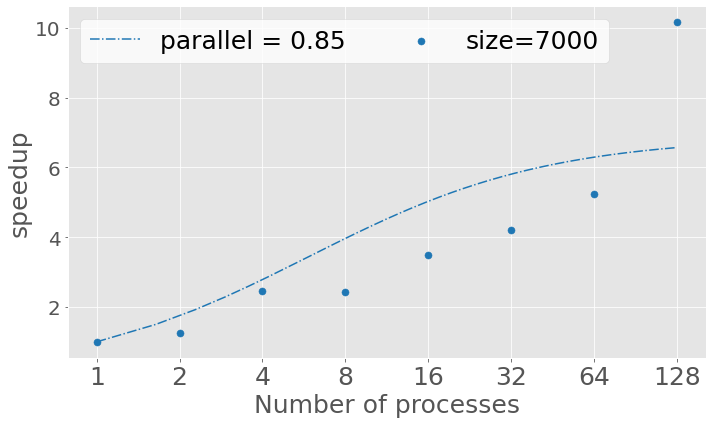

In [90]:
colors = vis.Color_palette(0)
xaxis = np.linspace(1,128,200)
fig, ax = vis.nice_plot(
    processes, speedup_ss, figsize = (10,6),
    scatter=True, scr_markersize=50, legend_loc=4, 
    data_label=r'size=7000', show_plot = False,
    color = colors[0])
fig, ax = vis.nice_plot(
    xaxis, amdahl(xaxis,ps),
    data_label='parallel = '+ '{:3.2f}'.format(ps), show_plot = False, axis = ax, figure=fig,
    linewidth=1.5, ylabel='speedup',  color = colors[0], linestyle='-.',
    xlabel='Number of processes')
#ax.set_ylim(0.5,4.5)
ax.legend(loc = 0, ncol = 3, fontsize = 25,facecolor = 'white')
ax.set_xscale('log', base=2)
labels = [1,2,4,8,16,32,64,128]
x = labels  # the label locations
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 25)

fig.tight_layout()
fig.savefig('strong_scaling.pdf', dpi = 80)
fig

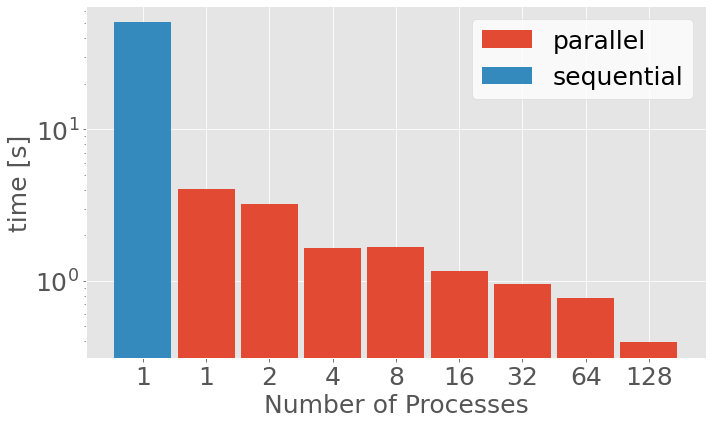

In [89]:
Data_s = Data_s[np.argsort(Data_s[:, 2])]#sort for worldsize
time_p = Data_s[:,1]


fig, ax = plt.subplots(1,figsize = (10,6))
#small
ax.bar(np.arange(1,9), time_p,.9, label = 'parallel')
ax.bar(0, time_seq,.9, label = 'sequential')
labels = [1, 1,2,4,8,16,32,64,128]
x = np.arange(9)  # the label locations
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 25)
ax.legend(loc = 0, ncol =1 , fontsize = 25,facecolor = 'white')
#ax.set_title('small world', fontsize = 25)
ax.set_ylabel('time [s]', fontsize = 25)
ax.set_xlabel('Number of Processes', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize=25)
#medium
ax.set_yscale('log')
fig.tight_layout()
fig.savefig('time_abs.pdf', dpi = 80)

In [ ]:
def gustafson(num_cores, serial): return num_cores + (1 - num_cores)*serial

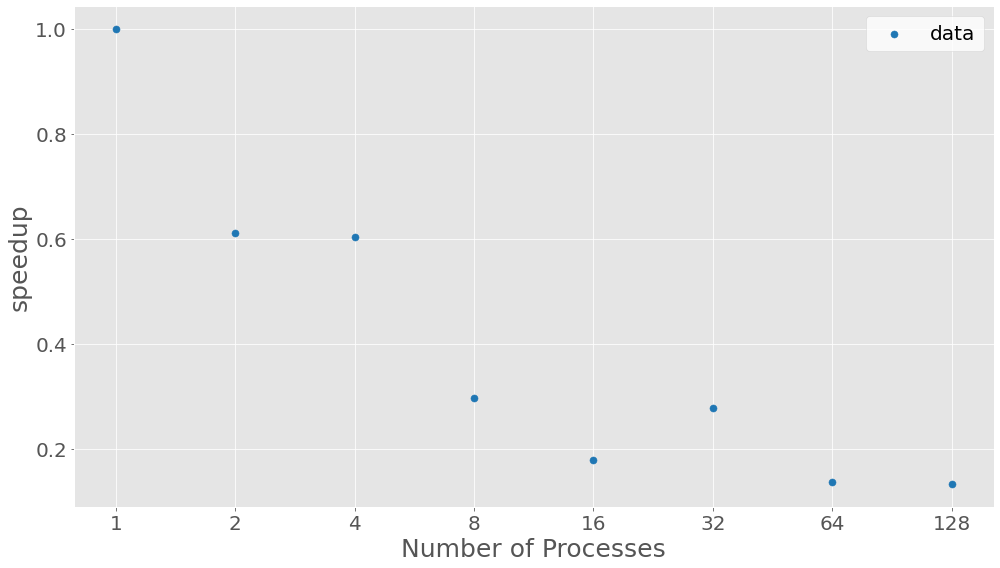

In [82]:
colors = vis.Color_palette(0)
xaxis = np.linspace(1,128,200)
Data_ws = Data_ws[np.argsort(Data_ws[:, 0])]
speedup_ws = Data_ws[1,1]/Data_ws[:,1]
serial = .99

fig, ax = vis.nice_plot(
    Data_ws[1:,0], speedup_ws[1:], figsize = (14,8),
    scatter=True, scr_markersize=50, legend_loc=4, 
    data_label=r'data', show_plot = False,
    color = colors[0])
#fig, ax = vis.nice_plot(
#    xaxis, gustafson(xaxis,serial),
#    data_label='parallel = '+ '{:3.2f}'.format(ps), show_plot = False, axis = ax, figure=fig,
#    linewidth=1.5, ylabel='speedup',  color = colors[0], linestyle='-.',
#    xlabel='Number of processes')
#ax.set_ylim(0.5,4.5)
ax.legend(loc = 0, ncol = 3, fontsize = 20,facecolor = 'white')
ax.set_xscale('log', base=2)
labels = [1,2,4,8,16,32,64,128]
x = labels  # the label locations
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 20)
ax.set_ylabel('speedup', fontsize = 25)
ax.set_xlabel('Number of Processes', fontsize = 25)
fig.tight_layout()
fig.savefig('weak_scaling.pdf', dpi = 80)
fig

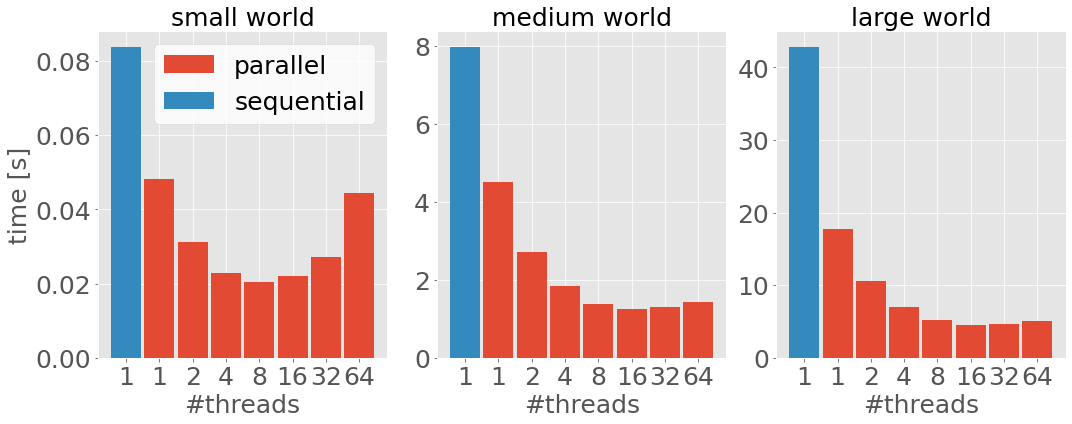

In [143]:
Data_s = Data_s[np.argsort(Data_s[:, 2])]#sort for worldsize
time_seq = Data_s[:,1]

#small world
Data_p_s = Data_p_s[np.argsort(Data_p_s[:, 0])]#sort for num_processors
time_p_s = Data_p_s[:,1]
#medium
Data_p_m = Data_p_m[np.argsort(Data_p_m[:, 0])]#sort for num_processors
time_p_m = Data_p_m[:,1]
#large
Data_p_l = Data_p_l[np.argsort(Data_p_l[:, 0])]#sort for num_processors
time_p_l = Data_p_l[:,1]

fig, ax = plt.subplots(1,3,figsize = (15,6))
#small
ax[0].bar(np.arange(1,8), time_p_s,.9, label = 'parallel')
ax[0].bar(0, time_seq[0],.9, label = 'sequential')
labels = [1, 1,2,4,8,16,32,64]
x = np.arange(8)  # the label locations
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels, fontsize = 25)
ax[0].legend(loc = 0, ncol =1 , fontsize = 25,facecolor = 'white')
ax[0].set_title('small world', fontsize = 25)
ax[0].set_ylabel('time [s]', fontsize = 25)
ax[0].set_xlabel('#threads', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=25)
#medium
ax[1].bar(np.arange(1,8), time_p_m,.9, label = 'parallel')
ax[1].bar(0, time_seq[1],.9, label = 'sequential')
labels = [1, 1,2,4,8,16,32,64]
x = np.arange(8)  # the label locations
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels, fontsize = 25)
ax[1].set_title('medium world', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=25)
ax[1].set_xlabel('#threads', fontsize = 25)
#large
ax[2].bar(np.arange(1,8), time_p_l,.9, label = 'parallel')
ax[2].bar(0, time_seq[2],.9, label = 'sequential')
labels = [1, 1,2,4,8,16,32,64]
x = np.arange(8)  # the label locations
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels, fontsize = 25)
ax[2].set_title('large world', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=25)
ax[2].set_xlabel('#Nprocs', fontsize = 25)
fig.tight_layout()
fig.savefig('time_abs.pdf', dpi = 80)

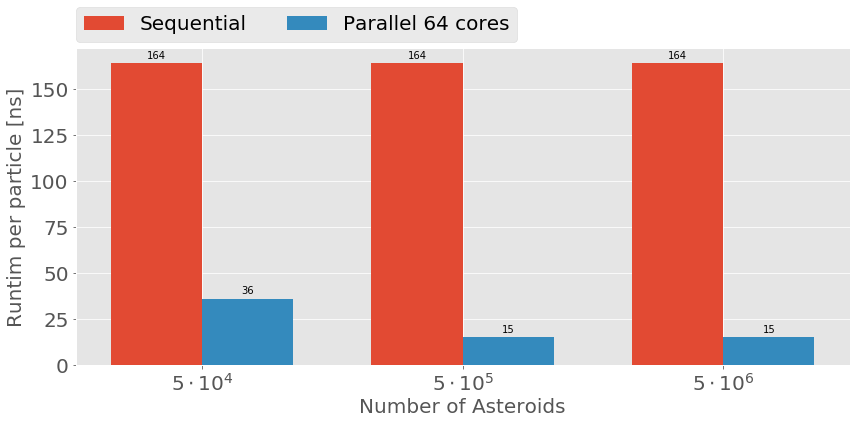

In [161]:
#choosing 24 processors for parallel computation
fig,ax = plt.subplots(figsize = (12,6))
plt.style.use('ggplot')
time_seq = np.array([164, 164, 164 ])
time_par = np.array([36, 15, 15])
labels = ['small', 'medium', 'large']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, time_seq, width, label='Sequential')
rects2 = ax.bar(x + width/2, time_par, width, label='Parallel 64 cores')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 20)
ax.legend(loc = (0,1.02), ncol =2 , fontsize = 20)
ax.set_xlabel('Size of the grid', fontsize = 20)
ax.set_ylabel('Runtime [s]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
